## Constructing Decision tree with simple example and classification problem. Calculating Entropy, Gini

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [2]:
animal_list = ['Elephant', 'Giraffe','Monkey','Elephant','Giraffe','Tiger','Giraffe','Tiger','Tiger','Tiger']
color_list=['Grey','Yellow','Brown','Grey','Yellow','Yellow','Yellow','Yellow','Yellow','Yellow']
height_list=[10,10,3,10,10,4,10,4,4,4]

In [3]:
dataset = employee_data = {'Color': color_list, 'Height': height_list, 'Animal_name': animal_list}

In [4]:
dt_data=pd.DataFrame(dataset)

In [5]:
dt_data

,Color,Height,Animal_name
0,Grey,10,Elephant
1,Yellow,10,Giraffe
2,Brown,3,Monkey
3,Grey,10,Elephant
4,Yellow,10,Giraffe
5,Yellow,4,Tiger
6,Yellow,10,Giraffe
7,Yellow,4,Tiger
8,Yellow,4,Tiger
9,Yellow,4,Tiger


In [6]:
cat_features = dt_data.drop('Animal_name',axis=1)
cat_target = dt_data['Animal_name']

In [7]:
label =LabelEncoder()
dt_data.Color = label.fit_transform(dt_data.Color)
dt_data.Animal_name = label.fit_transform(dt_data.Animal_name)

In [8]:
dt_features = dt_data.drop('Animal_name',axis=1)
dt_target = dt_data['Animal_name']

In [9]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth =4)
dt_model.fit(dt_features,dt_target)

DecisionTreeClassifier(max_depth=4)

In [10]:
dt_data.Animal_name.value_counts()

3    4
1    3
0    2
2    1
Name: Animal_name, dtype: int64

In [11]:
label.inverse_transform(dt_target)

array(['Elephant', 'Giraffe', 'Monkey', 'Elephant', 'Giraffe', 'Tiger',
       'Giraffe', 'Tiger', 'Tiger', 'Tiger'], dtype=object)

In [12]:
dt_model.feature_names_in_

array(['Color', 'Height'], dtype=object)

In [13]:
dt_target.unique()

array([0, 1, 2, 3])

In [14]:
print('Max_depth:',dt_model.get_depth())
print('Number of leave nodes: ',dt_model.get_n_leaves())

Max_depth: 2
Number of leave nodes:  4


##Calculation of Gini index

       Gini = 1- (sum(p)**2)

In [15]:
dt_data

,Color,Height,Animal_name
0,1,10,0
1,2,10,1
2,0,3,2
3,1,10,0
4,2,10,1
5,2,4,3
6,2,10,1
7,2,4,3
8,2,4,3
9,2,4,3


In [17]:
count_animals = [4,3,2,1]
new_list=[]
for i in count_animals:
  gini = ((i/sum(count_animals))**2)
  new_list.append(round(gini,2))
print(new_list)
print(1-sum(new_list))

[0.16, 0.09, 0.04, 0.01]
0.7


## Plotting decision tree

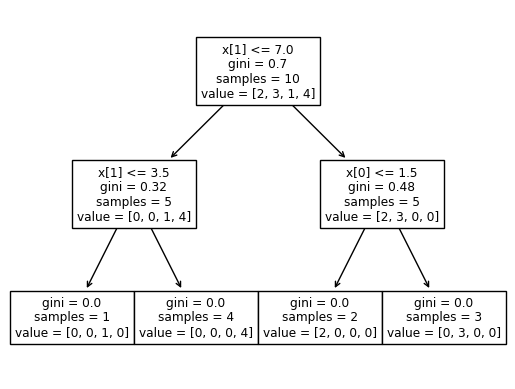

In [18]:
tree.plot_tree(dt_model)
plt.show()

In [19]:
dt_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth =4)
dt_model.fit(dt_features,dt_target)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

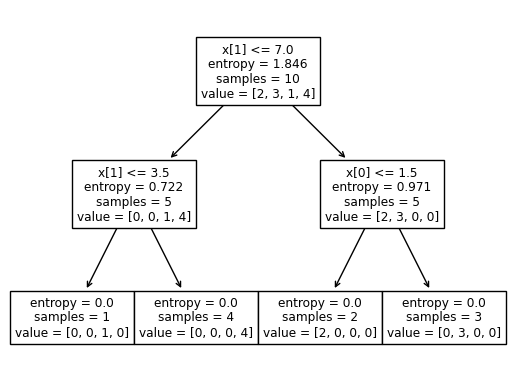

In [20]:
tree.plot_tree(dt_model)
plt.show()

##Calculation of entropy

               entropy = sum(plog2(P))

In [21]:
from numpy.ma.core import log2
en_list=[]
for i in count_animals:
  entropy = (i/sum(count_animals))*log2(i/sum(count_animals))
  en_list.append(round(-entropy,2))
print(en_list)
print(sum(en_list))

[0.53, 0.52, 0.46, 0.33]
1.84
